<a href="https://colab.research.google.com/github/SattuSupCodes/SentimentAnalysis_TheoreticalLearning/blob/main/speaker_diarisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import librosa
import numpy as np




In [3]:
!pip install --upgrade numpy scipy librosa

  Using cached numpy-2.4.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (6.6 kB)


In [2]:
!pip install openai-whisper


In [3]:
import whisper

model = whisper.load_model("base")
result = model.transcribe("sample3.wav")

segments = result["segments"]
for seg in segments:
    print(f"{seg['start']:.2f}-{seg['end']:.2f}: {seg['text']}")


/usr/local/lib/python3.12/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


0.00-5.00:  We almost forgot to wear these.
5.00-11.00:  Oh my gosh, guys, we are in our special holiday Christmas PJs.
11.00-12.00:  And we also have our Santa hats.
12.00-13.00:  Can we do it?
13.00-15.00:  It looks like I have hair still or no?
15.00-16.00:  Yeah, you do.
16.00-20.00:  You just look really ugly, but that's okay.
20.00-23.00:  You look like Santa's little helper.
23.00-28.00:  Well, anyways, we are dressed up in a very festive way.
28.00-29.00:  Yes.
29.00-35.00:  Because today is a holiday edition episode.
35.00-38.00:  May your Christmas everybody and happy Halloween.
38.00-41.00:  You mean holidays?
41.00-45.00:  So because that's about to be Christmas, we're going to eat.
45.00-47.00:  I don't know how that correlates.
47.00-53.00:  Well, we wanted to make this like a cute, cozy Christmas chronicle holiday festive season
53.00-56.00:  in Muffing Edition.
56.00-59.00:  But none of this is holiday.
59.00-63.00:  Yeah, we prepared our favorite takeout place from New

In [4]:
y, sr = librosa.load("sample3.wav", sr=None)


In [5]:
segment_len = int(1.5 * sr)
segments = [
    y[i:i+segment_len]
    for i in range(0, len(y), segment_len)
    if len(y[i:i+segment_len]) == segment_len
]


In [6]:



segment_len_sec = 1.5
segment_len = int(segment_len_sec * sr)

segments_audio = [
    y[i:i+segment_len]
    for i in range(0, len(y), segment_len)
    if len(y[i:i+segment_len]) == segment_len
]


In [7]:
def extract_mfcc(seg, sr):
    mfcc = librosa.feature.mfcc(y=seg, sr=sr, n_mfcc=13)
    return np.mean(mfcc, axis=1)

X = np.array([extract_mfcc(seg, sr) for seg in segments])


In [8]:
def mfcc_embed(seg, sr):
    mfcc = librosa.feature.mfcc(y=seg, sr=sr, n_mfcc=13)
    return np.mean(mfcc, axis=1)

X = np.array([mfcc_embed(seg, sr) for seg in segments_audio])


# Agglomerative Clustering
basically, we segmented our audio into many segments of 1.5 secs (we assume that thee spealers are consistent)

then our already-existng (thank you python-gods) agglomerative clustering helps in "this segment sounds very similar to this segment. CLUSTER" and boom

speaker 0 and speaker 1

In [9]:
from sklearn.cluster import AgglomerativeClustering

clusterer = AgglomerativeClustering(n_clusters=2)
labels = clusterer.fit_predict(X)


In [10]:
from sklearn.cluster import AgglomerativeClustering

labels = AgglomerativeClustering(n_clusters=2).fit_predict(X)
from sklearn.cluster import AgglomerativeClustering

labels = AgglomerativeClustering(n_clusters=2).fit_predict(X)


In [11]:
for i, label in enumerate(labels):
    start = i * 1.5
    end = start + 1.5
    print(f"{start:.1f}s - {end:.1f}s : Speaker {label}")


0.0s - 1.5s : Speaker 1
1.5s - 3.0s : Speaker 0
3.0s - 4.5s : Speaker 0
4.5s - 6.0s : Speaker 0
6.0s - 7.5s : Speaker 0
7.5s - 9.0s : Speaker 0
9.0s - 10.5s : Speaker 0
10.5s - 12.0s : Speaker 0
12.0s - 13.5s : Speaker 0
13.5s - 15.0s : Speaker 0
15.0s - 16.5s : Speaker 0
16.5s - 18.0s : Speaker 0
18.0s - 19.5s : Speaker 0
19.5s - 21.0s : Speaker 0
21.0s - 22.5s : Speaker 0
22.5s - 24.0s : Speaker 0
24.0s - 25.5s : Speaker 0
25.5s - 27.0s : Speaker 0
27.0s - 28.5s : Speaker 0
28.5s - 30.0s : Speaker 0
30.0s - 31.5s : Speaker 0
31.5s - 33.0s : Speaker 0
33.0s - 34.5s : Speaker 0
34.5s - 36.0s : Speaker 0
36.0s - 37.5s : Speaker 0
37.5s - 39.0s : Speaker 0
39.0s - 40.5s : Speaker 0
40.5s - 42.0s : Speaker 0
42.0s - 43.5s : Speaker 0
43.5s - 45.0s : Speaker 0
45.0s - 46.5s : Speaker 0
46.5s - 48.0s : Speaker 0
48.0s - 49.5s : Speaker 0
49.5s - 51.0s : Speaker 0
51.0s - 52.5s : Speaker 0
52.5s - 54.0s : Speaker 0
54.0s - 55.5s : Speaker 0
55.5s - 57.0s : Speaker 0
57.0s - 58.5s : Speaker 0

In [17]:
labels = labels.flatten()

def assign_speaker(start_time):
    idx = int(start_time / segment_len_sec)
    if idx < 0 or idx >= len(labels):
        return -1
    return int(labels[idx])

for seg in result["segments"]:
    spk = assign_speaker(seg["start"])
    print(f"[Speaker {spk}] {seg['text']}")

[Speaker 1]  We almost forgot to wear these.
[Speaker 0]  Oh my gosh, guys, we are in our special holiday Christmas PJs.
[Speaker 0]  And we also have our Santa hats.
[Speaker 0]  Can we do it?
[Speaker 0]  It looks like I have hair still or no?
[Speaker 0]  Yeah, you do.
[Speaker 0]  You just look really ugly, but that's okay.
[Speaker 0]  You look like Santa's little helper.
[Speaker 0]  Well, anyways, we are dressed up in a very festive way.
[Speaker 0]  Yes.
[Speaker 0]  Because today is a holiday edition episode.
[Speaker 0]  May your Christmas everybody and happy Halloween.
[Speaker 0]  You mean holidays?
[Speaker 0]  So because that's about to be Christmas, we're going to eat.
[Speaker 0]  I don't know how that correlates.
[Speaker 0]  Well, we wanted to make this like a cute, cozy Christmas chronicle holiday festive season
[Speaker 0]  in Muffing Edition.
[Speaker 0]  But none of this is holiday.
[Speaker 0]  Yeah, we prepared our favorite takeout place from New York City.
[Spe

 # Its not strong enough
 our sampe1.wav had woman(kendal jenner hehehe) and man (jay shetty) talking - best result for segregation

 our sample2 had two women of different race (pls don't cancel me on the race thing--i've known black women to have a bit more bold voice thats it ;-;) - average segregation

 our sample 3 has three young adult girls (HAHA Podcast of the Ha sisters) - worst segregation i've ever seen. It only clusetered ONE.

 Hence,

 # MFCC Has Its Own Limitations (which makes sense honestly cause it ain't God of Diarisation anyways sheh)

# CHECKPOINT TO BUILD SOMETHING STRONGER

In [2]:
# !pip install --quiet \
#   numpy==1.26.4 \
#   torch==2.1.2 \
#   torchaudio==2.1.2 \
#   speechbrain


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement torch==2.1.2 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1, 2.6.0, 2.7.0, 2.7.1, 2.8.0, 2.9.0, 2.9.1)
ERROR: No matching distribution found for torch==2.1.2


# EVERYTHING IS BREAKING
Why is ntg working (a dilemma every engineer finds themselves in)

In [3]:
# import torchaudio
# print(torchaudio.__version__)
# print(torchaudio.list_audio_backends())


2.9.1+cu128


AttributeError: module 'torchaudio' has no attribute 'list_audio_backends'

#Now that Pyannote and Speechbrain is out of question

Pyannote needs hugging face - my hugging face account is not being created like what kinda bug even is that

Speechbrain - im not downgrading my env

In [12]:
def mfcc_embed(seg, sr, n_mfcc=13):
    mfcc = librosa.feature.mfcc(y=seg, sr=sr, n_mfcc=n_mfcc)
    delta = librosa.feature.delta(mfcc)
    delta2 = librosa.feature.delta(mfcc, order=2)

    features = np.concatenate([
        np.mean(mfcc, axis=1),
        np.mean(delta, axis=1),
        np.mean(delta2, axis=1)
    ]) #lets just try making our mfcc stronger

    return features

In [13]:
def pitch_stats(seg, sr):
    pitch = librosa.yin(seg, fmin=50, fmax=400, sr=sr)
    pitch = pitch[~np.isnan(pitch)]
    if len(pitch) == 0:
        return [0, 0]
    return [np.mean(pitch), np.std(pitch)]


In [14]:
def full_embed(seg, sr):
    mfcc_feat = mfcc_embed(seg, sr)
    pitch_feat = pitch_stats(seg, sr)
    return np.concatenate([mfcc_feat, pitch_feat])


In [15]:
from sklearn.preprocessing import StandardScaler

X = np.array([full_embed(seg, sr) for seg in segments_audio])
X = StandardScaler().fit_transform(X)


In [19]:
from sklearn.cluster import AgglomerativeClustering

clusterer = AgglomerativeClustering(
    n_clusters=3,
    metric="cosine",
    linkage="average"
)

labels = clusterer.fit_predict(X)

In [20]:

np.unique(labels, return_counts=True)


(array([0, 1, 2]), array([27, 26, 19]))

In [21]:
for i, label in enumerate(labels):
    start = i * segment_len_sec
    end = start + segment_len_sec
    print(f"{start:.1f}s – {end:.1f}s : Speaker {label}")


0.0s – 1.5s : Speaker 1
1.5s – 3.0s : Speaker 2
3.0s – 4.5s : Speaker 2
4.5s – 6.0s : Speaker 0
6.0s – 7.5s : Speaker 2
7.5s – 9.0s : Speaker 1
9.0s – 10.5s : Speaker 1
10.5s – 12.0s : Speaker 0
12.0s – 13.5s : Speaker 0
13.5s – 15.0s : Speaker 1
15.0s – 16.5s : Speaker 1
16.5s – 18.0s : Speaker 0
18.0s – 19.5s : Speaker 0
19.5s – 21.0s : Speaker 2
21.0s – 22.5s : Speaker 0
22.5s – 24.0s : Speaker 1
24.0s – 25.5s : Speaker 1
25.5s – 27.0s : Speaker 0
27.0s – 28.5s : Speaker 1
28.5s – 30.0s : Speaker 1
30.0s – 31.5s : Speaker 2
31.5s – 33.0s : Speaker 0
33.0s – 34.5s : Speaker 0
34.5s – 36.0s : Speaker 1
36.0s – 37.5s : Speaker 0
37.5s – 39.0s : Speaker 1
39.0s – 40.5s : Speaker 1
40.5s – 42.0s : Speaker 1
42.0s – 43.5s : Speaker 2
43.5s – 45.0s : Speaker 2
45.0s – 46.5s : Speaker 0
46.5s – 48.0s : Speaker 2
48.0s – 49.5s : Speaker 2
49.5s – 51.0s : Speaker 1
51.0s – 52.5s : Speaker 0
52.5s – 54.0s : Speaker 2
54.0s – 55.5s : Speaker 2
55.5s – 57.0s : Speaker 0
57.0s – 58.5s : Speaker 2

In [23]:
def assign_speaker(start_time):
    idx = int(start_time // segment_len_sec)
    if idx >= len(labels):
        idx = len(labels) - 1
    return labels[idx]

for seg in result["segments"]:
    spk = assign_speaker(seg["start"])
    print(f"[Speaker {spk}] {seg['text']}")

[Speaker 1]  We almost forgot to wear these.
[Speaker 0]  Oh my gosh, guys, we are in our special holiday Christmas PJs.
[Speaker 0]  And we also have our Santa hats.
[Speaker 0]  Can we do it?
[Speaker 0]  It looks like I have hair still or no?
[Speaker 1]  Yeah, you do.
[Speaker 1]  You just look really ugly, but that's okay.
[Speaker 2]  You look like Santa's little helper.
[Speaker 1]  Well, anyways, we are dressed up in a very festive way.
[Speaker 1]  Yes.
[Speaker 1]  Because today is a holiday edition episode.
[Speaker 1]  May your Christmas everybody and happy Halloween.
[Speaker 1]  You mean holidays?
[Speaker 1]  So because that's about to be Christmas, we're going to eat.
[Speaker 0]  I don't know how that correlates.
[Speaker 2]  Well, we wanted to make this like a cute, cozy Christmas chronicle holiday festive season
[Speaker 2]  in Muffing Edition.
[Speaker 0]  But none of this is holiday.
[Speaker 0]  Yeah, we prepared our favorite takeout place from New York City.
[Spe

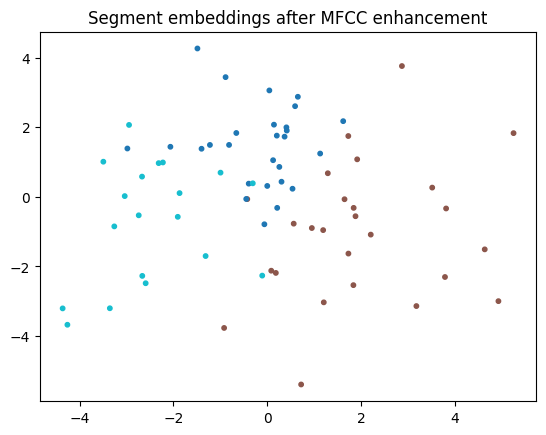

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_2d = PCA(n_components=2).fit_transform(X)

plt.scatter(X_2d[:,0], X_2d[:,1], c=labels, cmap="tab10", s=10)
plt.title("Segment embeddings after MFCC enhancement")
plt.show()


#So.. this one seems to catch bits of the 3rd speaker
still using sample3.wav (the Ha sisters audio), our mfcc is now using delta delta mfcc

and exctracting at a deeper level

yet... its not ... perfect but appreciatin the improvement